#### Importing Libraries

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt


### Merging 12 month of sales data into a single file

In [5]:
df=pd.read_csv(r"D:\COLLEGE\PROJECTS\DA\Data_Analysis\SalesDataSet\Sales_Data\Sales_April_2019.csv")
csv_files = [
    file for file in os.listdir('D:\COLLEGE\PROJECTS\DA\Data_Analysis\SalesDataSet\Sales_Data')]
#Creating an Empty Data Frame
all_months=pd.DataFrame()
for file in csv_files:
    df=pd.read_csv(r"D:/COLLEGE/PROJECTS/DA/Data_Analysis/SalesDataSet/Sales_Data/"+ file)
    all_months = pd.concat([all_months,df])

all_months.to_csv("all_data.csv", index=False)

In [6]:
#Reading new data
all_data = pd.read_csv("all_data.csv")
all_data.columns.duplicated().any()

False

Clean data

In [7]:
all_data =all_data.dropna(how="all")
all_data = all_data[all_data['Order Date'].str[0:2]!="Or"]

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

Add month column

In [8]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months']  = all_data['Months'].astype(int)
# all_data.head()

Add a sales column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#Question 1: What was the best month for sales? 

In [10]:
q1=all_data.groupby('Months').sum()
q1

,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


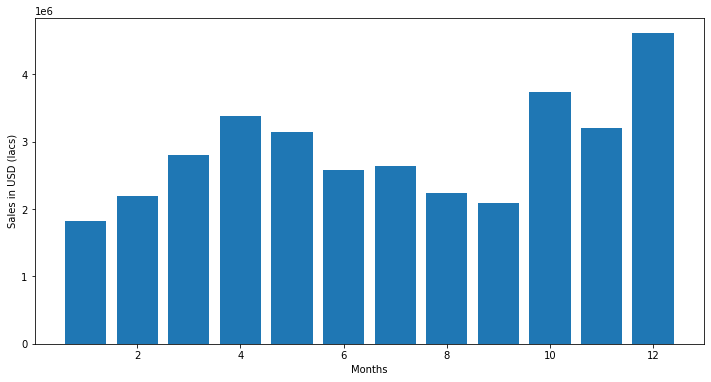

In [11]:
plt.figure(figsize=(12,6))
months= range(1,13)
plt.bar(months,q1['Sales'])
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Months')
plt.show()

OBV - DECEMBER was the best month of sales, followed by October.

What city sold the most product?

In [12]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [13]:
q2=all_data.groupby('City').sum()

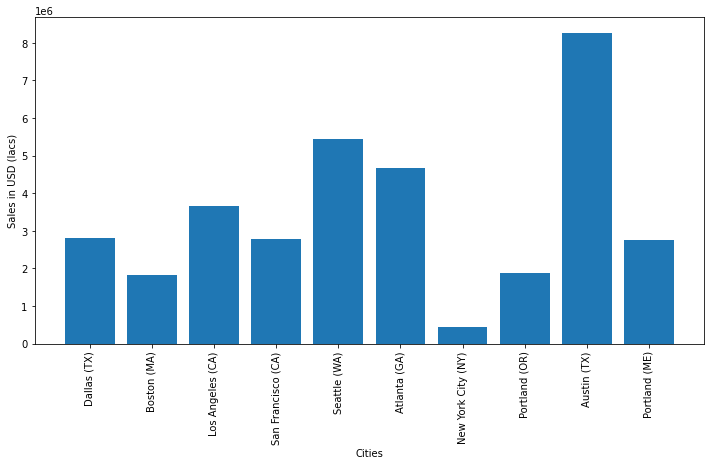

In [14]:
plt.figure(figsize=(12,6))
cities = all_data['City'].unique()
plt.bar(cities,q2['Sales'])
plt.xticks(rotation= 90)
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Cities')
plt.show()

OBV - Most Products were sold in Austin(TX)

What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [16]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

#this step is a bit time consuming(26s)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


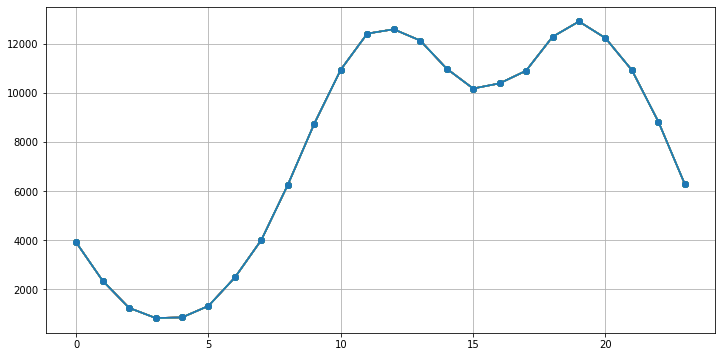

In [34]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(12,6))
plt.plot(hours,all_data.groupby('Hour').count(),marker='o')
plt.grid()
plt.show()

OBV - The number of orders peaked from 11am-12noon and 18-19pm hence,the ideal time would be to place ads before 11am and 6pm

What products are most often sold together?

OBV-

What product sold the most? Why do you think it sold the most?

OBV-